## Quantum Phase Estimation of T Gate
--------------------------------------------------

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'
import numpy as np
from numpy import pi

from qiskit import QuantumCircuit,ClassicalRegister,QuantumRegister,Aer,execute
from qiskit.visualization import plot_histogram

In [59]:
qpe = QuantumCircuit(4,3)
qpe.x(3)
for i in range(3):
    qpe.h(i)

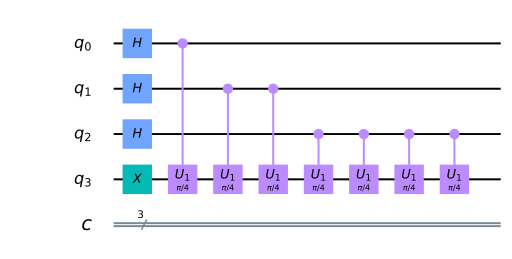

In [60]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cu1(math.pi/4, counting_qubit, 3); # This is C-U
    repetitions *= 2
qpe.draw(output='mpl')

In [61]:
def qft_dagger(circ, n):
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu1(-math.pi/float(2**(j-m)), m, j)
        circ.h(j)

In [62]:
qpe.barrier()
qft_dagger(qpe, 3)
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)


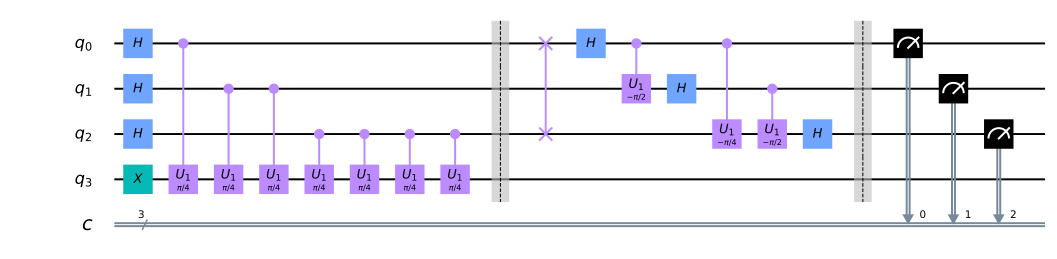

In [65]:
qpe.draw('mpl')

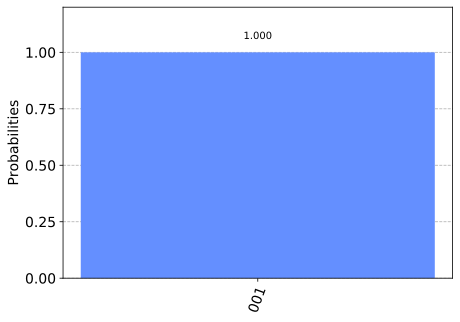

In [66]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)
